In [1]:
import numpy as np
import pandas as pd
import os
from scipy.io.arff import loadarff 

raw_data = loadarff('data/1year.arff')
df_data = pd.DataFrame(raw_data[0])


In [2]:
os.listdir('data')


['2year.arff', '3year.arff', '5year.arff', '4year.arff', '1year.arff']

In [3]:
import os
all_data=pd.DataFrame()
for i in (os.listdir('data')):
    raw_data =loadarff('data/'+i)
    df_data = pd.DataFrame(raw_data[0])
    df_data["Year"]=i[0]
    all_data = all_data.append(df_data, ignore_index=True)
    


In [125]:
all_data.shape

(43405, 66)

In [4]:
all_data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,Year
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,b'0',2
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,b'0',2
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,b'0',2
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,b'0',2
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,b'0',2


### Class/target distribution

In [7]:
from collections import Counter
all_data["class"]=all_data['class'].map(lambda row: 0 if '0' in str(row) else 1)
Counter(all_data["class"])


Counter({0: 41314, 1: 2091})

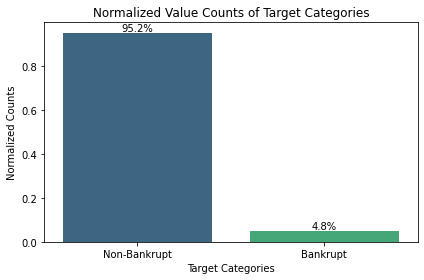

In [126]:
import seaborn as sns
target_dt=all_data["class"].value_counts(normalize=True)

import matplotlib.pyplot as plt
# Create a bar plot using Seaborn
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=target_dt.index, y=target_dt.values, palette="viridis")
plt.xlabel("Target Categories")
plt.ylabel("Normalized Counts")
plt.title("Normalized Value Counts of Target Categories")

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
ax.set_xticklabels(["Non-Bankrupt", "Bankrupt"])

plt.tight_layout()
plt.show()

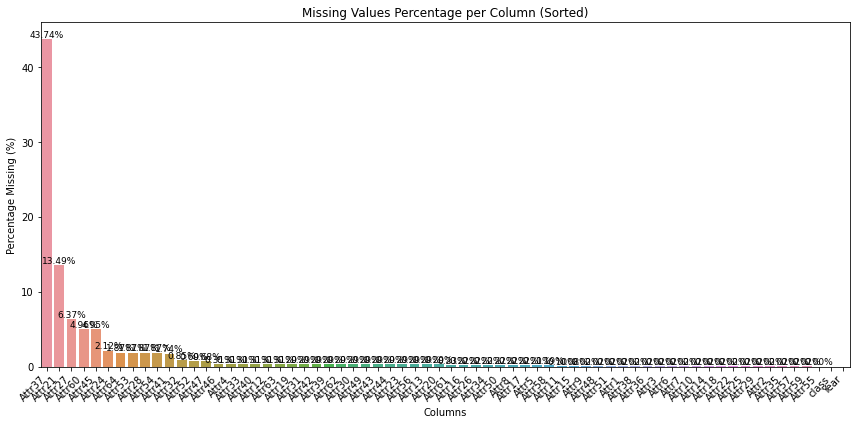

In [129]:


# Assuming 'df' is your DataFrame
missing_data = all_data.isnull().mean() * 100  # Calculate the percentage of missing values per column

# Sort the missing_data Series in descending order
missing_data_sorted = missing_data.sort_values(ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=missing_data_sorted.index, y=missing_data_sorted.values)
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.title('Missing Values Percentage per Column (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with percentage values (if greater than 0)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)
plt.show()


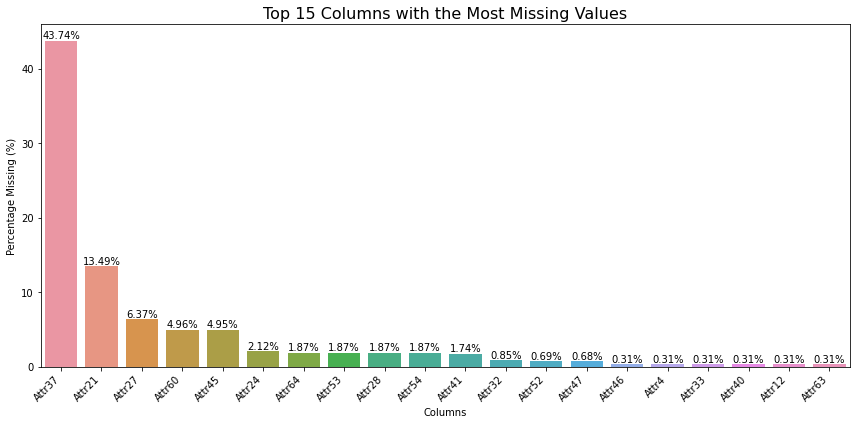

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
missing_data = all_data.isnull().mean() * 100  # Calculate the percentage of missing values per column

# Sort the missing_data Series in descending order
missing_data_sorted = missing_data.sort_values(ascending=False)

# Select the top 10 columns with the most missing values
top_10_missing_data = missing_data_sorted[:20]

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_missing_data.index, y=top_10_missing_data.values)
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.title('Top 15 Columns with the Most Missing Values', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with percentage values (if greater than 0)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)
plt.show()


### Checking for missing variables

In [41]:
all_data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,1.088350e+03,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,4.993325e+03,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


### Visualizing missing variables

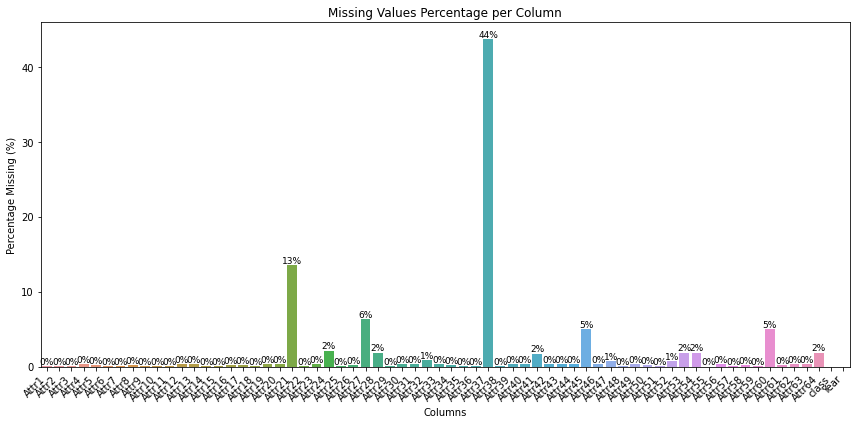

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# checkin percentage of missing attribute per column
# Assuming 'df' is your DataFrame
missing_data = all_data.isnull().mean() * 100  # Calculate the percentage of missing values per column

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.title('Missing Values Percentage per Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with percentage values (if greater than 0)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',fontsize=9)
plt.show()

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
# checkin percentage of missing attribute per column
# Assuming 'df' is your DataFrame
missing_data = all_data.isnull().mean() * 100  # Calculate the percentage of missing values per column

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.title('Missing Values Percentage per Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with percentage values (if greater than 0)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',fontsize=9)
plt.show()

64

In [139]:
all_data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,0.048174
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482,0.214137
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,0.000000
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,0.000000
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200,0.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000


### Impute all missing variables

In [51]:
from sklearn.impute import KNNImputer
X=all_data.iloc[:,:-2]
y=all_data["class"]

imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_imputed=imputer.fit_transform(X)

In [52]:
X_imputed

array([[ 2.0235e-01,  4.6500e-01,  2.4038e-01, ...,  1.0774e+02,
         3.3879e+00,  5.3440e+00],
       [ 3.0073e-02,  5.9563e-01,  1.8668e-01, ...,  6.2266e+02,
         5.8619e-01,  1.2381e+00],
       [ 2.5786e-01,  2.9949e-01,  6.6519e-01, ...,  6.5215e+01,
         5.5969e+00,  4.7466e+01],
       ...,
       [ 6.3380e-03,  5.0276e-01,  4.3923e-01, ...,  5.1019e+01,
         7.1542e+00,  6.2001e+01],
       [-4.1643e-02,  8.4810e-01, -1.2852e-01, ...,  2.6185e+02,
         1.3939e+00,  5.1005e-01],
       [ 1.4946e-02,  9.4648e-01,  3.2110e-02, ...,  1.0864e+02,
         3.3599e+00,  3.5118e+01]])

In [54]:
# Checking missing data after KNN imputer
np.count_nonzero(np.isnan(X_imputed))

0

### Modeling

+ Cross Val-Random Forest

In [97]:
%%time
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

my_model = RandomForestClassifier(n_estimators=20,n_jobs=-1)
p = cross_val_predict(my_model, X_imputed, y, cv=5, method='predict_proba')


CPU times: user 933 ms, sys: 295 ms, total: 1.23 s
Wall time: 22.6 s


In [90]:
# l=[.4,.7,.9,.2]
# [int(bool(i<.25)) for i in l ]


[0, 0, 0, 1]

In [138]:
predicted_labels = [1 if prob[1] > .10 else 0 for prob in p]
# predicted_labels = p.argmax(axis=1)

# !!!!!Don't run the bellow left it for discussion look at the different scores according to threashold!!!!!!!!!

+ True posite= bankrupt and marking it as bankrupt 
+ False pasitive= marking it as bankrupt but not not 
+ False negative= marked as not bankrupt and is bankrupt 
### We care about recall because we want to make sure we capture the pattern of those bankrupt? We care about false negatives but we also don't want to have the predicted as bankrupt with a bunch that won't so we also care about keeping the precision.


# I think Threashold of .10 its the best gets recall up to 66% while keeping pression at 22% focusing on bankrupt. What do you all think?


In [107]:
# .50 Threashold
print(classification_report(y,predicted_labels))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41314
           1       0.58      0.09      0.16      2091

    accuracy                           0.95     43405
   macro avg       0.77      0.54      0.57     43405
weighted avg       0.94      0.95      0.94     43405



In [104]:
#.15 threashold
print(classification_report(y,predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     41314
           1       0.28      0.54      0.37      2091

    accuracy                           0.91     43405
   macro avg       0.63      0.73      0.66     43405
weighted avg       0.94      0.91      0.92     43405



In [139]:
#.10 threashold
from sklearn.metrics import classification_report
print(classification_report(y,predicted_labels))


              precision    recall  f1-score   support

           0       0.98      0.88      0.93     41314
           1       0.22      0.66      0.32      2091

    accuracy                           0.87     43405
   macro avg       0.60      0.77      0.63     43405
weighted avg       0.94      0.87      0.90     43405



In [116]:
#.08 threashold
from sklearn.metrics import classification_report
print(classification_report(y,predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87     41314
           1       0.15      0.77      0.25      2091

    accuracy                           0.78     43405
   macro avg       0.57      0.77      0.56     43405
weighted avg       0.95      0.78      0.84     43405



1:Bankrupt
    Positive: Bankrupt and classify as banckrupt
        minimize the amount of times we classify something as not bankrupt but is bankrupt care recall 77%
        minimize the amount of non banrupt companies classiried as bankrup then precision 15%
0:Non-backrupt
    minimize the amount of time classify something as tp/(tp+fp) calling it classifying it as bankrup when its non bankrup
    mi classifying as  bankrupt when it is non backrupt

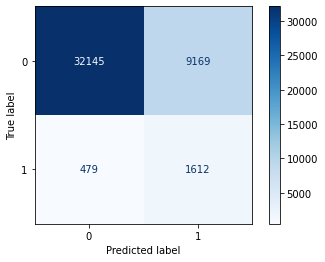

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y,predicted_labels, cmap="Blues")

+ Running Randomized Search cv

In [68]:
%%time
from sklearn.model_selection import RandomizedSearchCV
params ={'n_estimators':[20],
        'criterion':['gini','entropy'],
        'max_depth': [5,10,15,20,30,40],
        'min_samples_split':[16,12,10,8,6],
        'min_samples_leaf':[6,5,4,3,2],
        'max_features':[5,10,15,20,30,40]}
my_search = RandomizedSearchCV(my_model,params,n_iter=20,cv=5,n_jobs=-1)
my_search.fit(X_imputed,y)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=20, n_jobs=-1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 30, 40],
                                        'max_features': [5, 10, 15, 20, 30, 40],
                                        'min_samples_leaf': [6, 5, 4, 3, 2],
                                        'min_samples_split': [16, 12, 10, 8, 6],
                                        'n_estimators': [20]})

In [69]:
my_search.best_estimator_


RandomForestClassifier(criterion='entropy', max_depth=30, max_features=40,
                       min_samples_leaf=3, min_samples_split=10,
                       n_estimators=20, n_jobs=-1)

##### Running model according to best params

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, shuffle=True, stratify=y)

In [140]:
from sklearn import metrics as mt

# Function to get the metrics
# Bankrupt positive class
def score_rep(model, threshold=0.10):
    m_prob=model.predict_proba(X_test)
    preds = np.where(m_prob[:, 1] > threshold, 1, 0)
    prob_df = pd.DataFrame({"prediProb": model.predict_proba(X_test)[:, 1], "pred": preds, "actual": y_test})
    fp = prob_df[(prob_df["actual"] == 0) & (prob_df["pred"] == 1)].shape[0]
    tp = prob_df[(prob_df["actual"] == 1) & (prob_df["pred"] == 1)].shape[0]
    fn = prob_df[(prob_df["actual"] == 1) & (prob_df["pred"] == 0)].shape[0]
    tn = prob_df[(prob_df["actual"] == 0) & (prob_df["pred"] == 0)].shape[0]

    prec = round((tp / (fp + tp)), 3)
    rec = round((tp / (tp + fn)), 3)
    acc = round(((tp + tn) / (tp + fp + fn + tn)), 3)
    f1 = round((mt.f1_score(y_test, preds)), 3)
    auc = round((mt.roc_auc_score(y_test, m_prob[:, 1])), 3)

    print('Accuracy is: %.2f, \n Recall is: %.2f, \n Precision is: %.2f, \n F1 is %.2f and \n AUC is %.2f' % (acc, rec, prec, f1, auc))
    return preds, acc, rec, prec, f1, auc


In [134]:
#Threashold of 10
rm_cl = RandomForestClassifier(n_estimators=100,max_depth=30,max_features=40,min_samples_leaf=3,min_samples_split=10, n_jobs=-1)
rm_cl.fit(X_train,y_train)
pred,acc, rec,prec,f1,auc=score_rep(rm_cl)
model_results=[["Random Classifier=",acc, rec,prec,f1,auc]]

Accuracy is: 0.87, 
 Recall is: 0.74, 
 Precision is: 0.23, 
 F1 is 0.36 and 
 AUC is 0.90


In [136]:
#.10 threashold
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.99      0.88      0.93     12395
           1       0.24      0.74      0.36       627

    accuracy                           0.87     13022
   macro avg       0.61      0.81      0.64     13022
weighted avg       0.95      0.87      0.90     13022



### Improves recall from %66 to %74 and precision from 22% to 24% focusing on bankrupt. It has a total recall change of 77% to 81% to and total precision from 60% to 61%


In [141]:
#Threashold of .08
pred,acc, rec,prec,f1,auc=score_rep(rm_cl)

Accuracy is: 0.84, 
 Recall is: 0.78, 
 Precision is: 0.20, 
 F1 is 0.31 and 
 AUC is 0.90


In [143]:
feature_import = pd.DataFrame({"Feature":X.columns.tolist(),"Value":rm_cl.feature_importances_})


In [146]:
feature_import.sort_values(['Value'],ascending=False).head(5)


,Feature,Value
45,Attr46,0.057618
33,Attr34,0.044046
4,Attr5,0.042444
26,Attr27,0.041164
23,Attr24,0.039895


# Boosting

In [6]:
# import sys
# !{sys.executable} -m pip install xgboost

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

In [74]:
#Fix NA
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit(X_train)
X_train_imputed=imputer.transform(X_train)
X_test_imputed=imputer.transform(X_test)

In [75]:
dtrain=xgb.DMatrix(X_train_imputed, label=y_train)
dtest=xgb.DMatrix(X_test_imputed, label=y_test)

# evallist=[(dtest,'eval'),(dtrain,'train')]
evallist=[(dtrain,'train'),(dtest,'eval')]

In [76]:
Counter(y)

Counter({0: 41314, 1: 2091})

In [77]:
num_round=100
param ={
    'objective': 'binary:logistic',
    'eval_metric': 'logloss', 
    'max_depth':10,
    'eta':0.1
}

In [78]:
my_model= xgb.train(param,dtrain,num_round,evals=evallist,early_stopping_rounds=2)


/Users/lauraahumada/opt/anaconda3/envs/smuenv/lib/python3.7/site-packages/xgboost/core.py:571: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[0]	train-logloss:0.60979	eval-logloss:0.61189
[1]	train-logloss:0.54111	eval-logloss:0.54546
[2]	train-logloss:0.48368	eval-logloss:0.49003
[3]	train-logloss:0.43490	eval-logloss:0.44342
[4]	train-logloss:0.39332	eval-logloss:0.40368
[5]	train-logloss:0.35725	eval-logloss:0.36949
[6]	train-logloss:0.32614	eval-logloss:0.33976
[7]	train-logloss:0.29834	eval-logloss:0.31377
[8]	train-logloss:0.27430	eval-logloss:0.29125
[9]	train-logloss:0.25261	eval-logloss:0.27112
[10]	train-logloss:0.23353	eval-logloss:0.25391
[11]	train-logloss:0.21649	eval-logloss:0.23862
[12]	train-logloss:0.20135	eval-logloss:0.22485
[13]	train-logloss:0.18795	eval-logloss:0.21315
[14]	train-logloss:0.17557	eval-logloss:0.20287
[15]	train-logloss:0.16352	eval-logloss:0.19263
[16]	train-logloss:0.15354	eval-logloss:0.18444
[17]	train-logloss:0.14452	eval-logloss:0.17702
[18]	train-logloss:0.13632	eval-logloss:0.17036
[19]	train-logloss:0.12855	eval-logloss:0.16417
[20]	train-logloss:0.12157	eval-logloss:0.15894
[2

In [83]:
from sklearn.metrics import recall_score
y_pred = [1 if p > 0.10 else 0 for p in my_model.predict(dtest)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     12395
           1       0.50      0.62      0.55       627

    accuracy                           0.95     13022
   macro avg       0.74      0.80      0.76     13022
weighted avg       0.96      0.95      0.95     13022



 ### Total precision goes up from 61 to 74% and the recall goes 1 point does from 81 to 80%. The overall accuracy increases from 87 to 95%

In [92]:
dmatrix = xgb.DMatrix(X_imputed, label=y)
# Perform cross-validation with xgb.cv
cv_results = xgb.cv(
    params=param,
    dtrain=dmatrix,
    num_boost_round=10,  
    nfold=5,               
    metrics=['logloss', 'error', 'auc'],   
    early_stopping_rounds=10
)

# The cv_results is a DataFrame containing cross-validation results
print(cv_results)

   train-logloss-mean  train-logloss-std  train-error-mean  train-error-std  \
0            0.610145           0.000114          0.033383         0.000233   
1            0.541949           0.000177          0.032640         0.000789   
2            0.484692           0.000351          0.031920         0.000774   
3            0.435986           0.000347          0.031373         0.000561   
4            0.394240           0.000514          0.031264         0.000668   
5            0.358227           0.000631          0.030970         0.000905   
6            0.326883           0.000521          0.030359         0.000743   
7            0.299430           0.000740          0.029991         0.000870   
8            0.275253           0.000560          0.029662         0.000701   
9            0.253979           0.000529          0.029478         0.000510   

   train-auc-mean  train-auc-std  test-logloss-mean  test-logloss-std  \
0        0.831870       0.005606           0.612293      

In [93]:
# Extract mean accuracy and recall from cv_results
mean_accuracy = 1 - cv_results['test-error-mean'].values[-1]
mean_recall = cv_results['test-auc-mean'].values[-1]

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean AUC (Recall): {mean_recall:.4f}")


Mean Accuracy: 0.9593
Mean AUC (Recall): 0.8657


In [105]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score,f1_score
from sklearn.model_selection import KFold

# Perform cross-validation with xgb.cv
kf = KFold(n_splits=5, shuffle=True)
f1_scores = []
recall_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X_imputed[train_index], X_imputed[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    model = xgb.train(param, dtrain, num_boost_round=100, evals=[(dtest, 'eval')], early_stopping_rounds=10, verbose_eval=False)
    
    y_pred = model.predict(dtest)
    print(Counter(y_pred))
    y_pred_binary = [1 if p > 0.10 else 0 for p in y_pred]
    
    f1_ = f1_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    
    f1_scores.append(f1_)
    recall_scores.append(recall)

# Calculate mean accuracy and recall
mean_f1 = np.mean(f1_scores)
mean_recall = np.mean(recall_scores)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")


Counter({0.0032967879: 3, 0.001084275: 2, 0.0017064818: 2, 0.0011588637: 2, 0.002993465: 2, 0.0038119582: 2, 0.0070803864: 2, 0.001978631: 2, 0.37427467: 2, 0.0010541023: 2, 0.0031999515: 2, 0.00596379: 2, 0.019514475: 2, 0.020513225: 2, 0.004890794: 2, 0.0029737316: 2, 0.009642282: 2, 0.0013326552: 2, 0.013808872: 2, 0.002456726: 2, 0.00079066725: 2, 0.011185328: 2, 0.00077062286: 2, 0.000866534: 2, 0.0013061826: 2, 0.0065258313: 2, 0.0018611372: 2, 0.0023469934: 2, 0.00062476046: 2, 0.0012530229: 2, 0.0030457363: 2, 0.0055463994: 2, 0.013874813: 2, 0.0051606: 2, 0.0028193037: 2, 0.0069017294: 1, 0.009119263: 1, 0.050748076: 1, 0.011469867: 1, 0.004715222: 1, 0.012738536: 1, 0.039003156: 1, 0.21361138: 1, 0.024298029: 1, 0.0036724953: 1, 0.0010832569: 1, 0.0012170185: 1, 0.01237138: 1, 0.0020106444: 1, 0.0017499811: 1, 0.004464962: 1, 0.018231766: 1, 0.008674731: 1, 0.0021448631: 1, 0.026939884: 1, 0.031697683: 1, 0.00085463095: 1, 0.00063948665: 1, 0.0011052208: 1, 0.006003166: 1, 0.

Counter({0.0010372797: 2, 0.0027246354: 2, 0.024781875: 2, 0.02141732: 2, 0.0014186301: 2, 0.011119018: 2, 0.0031285777: 2, 0.034505468: 2, 0.00083303655: 2, 0.013110107: 2, 0.0016621858: 2, 0.0019798505: 2, 0.0011451042: 2, 0.0011956886: 2, 0.016422832: 2, 0.014955639: 2, 0.023900885: 2, 0.0012009724: 2, 0.051402166: 2, 0.002754591: 2, 0.0014207332: 2, 0.04193562: 2, 0.0042648776: 2, 0.0030874955: 2, 0.0050553745: 2, 0.0035035182: 2, 0.004917153: 2, 0.00072295696: 2, 0.0020274732: 2, 0.0013765857: 2, 0.0030916503: 2, 0.0058613634: 2, 0.0013582768: 2, 0.003514952: 2, 0.017969063: 2, 0.0016616256: 2, 0.0018176507: 1, 0.00040689512: 1, 0.001385315: 1, 0.0013528824: 1, 0.002555747: 1, 0.0012396973: 1, 0.000674329: 1, 0.08635949: 1, 0.0021983478: 1, 0.020317787: 1, 0.00048229203: 1, 0.03180811: 1, 0.044205226: 1, 0.0031011708: 1, 0.0014249892: 1, 0.0034542456: 1, 0.00056182855: 1, 0.00062476407: 1, 0.00576547: 1, 0.0033402261: 1, 0.0005402263: 1, 0.0066523994: 1, 0.006781933: 1, 0.00111215

Counter({0.0015794083: 2, 0.009260613: 2, 0.0033075726: 2, 0.0008270654: 2, 0.011301535: 2, 0.0012546728: 2, 0.017096588: 2, 0.025078254: 2, 0.017987983: 2, 0.0014260889: 2, 0.0016304586: 2, 0.02802522: 2, 0.022131639: 2, 0.00045640813: 2, 0.0009331497: 2, 0.0021884597: 2, 0.0013773344: 2, 0.0009550975: 2, 0.00459178: 2, 0.001838857: 2, 0.34067413: 2, 0.0005476419: 2, 0.0020795292: 2, 0.0032242783: 2, 0.0038182866: 2, 0.0005958496: 2, 0.0017447883: 2, 0.039723776: 2, 0.0045333183: 2, 0.0053062323: 2, 0.020346215: 1, 0.008680777: 1, 0.0005920607: 1, 0.026387999: 1, 0.0064566866: 1, 0.0054157334: 1, 0.0021459903: 1, 0.0015984594: 1, 0.0016716549: 1, 0.00052587123: 1, 0.0081653455: 1, 0.008963719: 1, 0.0008124247: 1, 0.017360983: 1, 0.03648314: 1, 0.0673061: 1, 0.005792363: 1, 0.009989902: 1, 0.0068416228: 1, 0.022797966: 1, 0.0029336808: 1, 0.0009843998: 1, 0.0024129855: 1, 0.009834684: 1, 0.0026768835: 1, 0.006094777: 1, 0.0045616445: 1, 0.0032335662: 1, 0.0035367901: 1, 0.010515503: 1,

Counter({0.004820991: 2, 0.020044073: 2, 0.0004279014: 2, 0.02666212: 2, 0.0045213504: 2, 0.0068623996: 2, 0.00049690314: 2, 0.009568727: 2, 0.0014911551: 2, 0.004584793: 2, 0.013136593: 2, 0.0032243272: 2, 0.0033455896: 2, 0.0017193494: 2, 0.00050166127: 2, 0.0007311761: 2, 0.0013466118: 2, 0.0065184715: 2, 0.0009924019: 2, 0.010207069: 2, 0.0030025267: 2, 0.00056875177: 2, 0.0005879822: 2, 0.0028793733: 2, 0.00473906: 2, 0.03908846: 2, 0.007858889: 2, 0.032505617: 2, 0.009276647: 2, 0.00398315: 1, 0.013352076: 1, 0.015362975: 1, 0.000636291: 1, 0.027180318: 1, 0.012714954: 1, 0.00052694447: 1, 0.016816327: 1, 0.0075503383: 1, 0.012733932: 1, 0.0009299745: 1, 0.004784175: 1, 0.0018448874: 1, 0.004282637: 1, 0.010924074: 1, 0.016206369: 1, 0.040364645: 1, 0.023003006: 1, 0.024220651: 1, 0.16042486: 1, 0.002048704: 1, 0.024518257: 1, 0.025525557: 1, 0.0694125: 1, 0.0023109778: 1, 0.004883392: 1, 0.0014887282: 1, 0.006228977: 1, 0.00989669: 1, 0.0008991041: 1, 0.010721681: 1, 0.001910516

Counter({0.0030313493: 2, 0.0074804854: 2, 0.022893803: 2, 0.0010670476: 2, 0.0016240027: 2, 0.0018305235: 2, 0.0046603777: 2, 0.012406375: 2, 0.0074967137: 2, 0.004819957: 2, 0.0017911837: 2, 0.000984307: 2, 0.08222348: 2, 0.0014498906: 2, 0.0016222625: 2, 0.0032142727: 2, 0.0011568073: 2, 0.015299579: 2, 0.0025702238: 2, 0.003919758: 2, 0.0014595927: 2, 0.0021207682: 2, 0.003653443: 2, 0.01335831: 2, 0.0005160015: 2, 0.008797439: 2, 0.0016908178: 2, 0.0018104695: 2, 0.0056060585: 2, 0.0022742525: 2, 0.0065075094: 2, 0.022981673: 2, 0.64967614: 2, 0.0018601171: 2, 0.052686576: 2, 0.0013677485: 2, 0.002908315: 2, 0.0010256027: 2, 0.1887016: 2, 0.0006495224: 1, 0.005727077: 1, 0.004438261: 1, 0.00061295467: 1, 0.008114317: 1, 0.0021023273: 1, 0.03233607: 1, 0.057957254: 1, 0.008079938: 1, 0.00072727684: 1, 0.07465087: 1, 0.003436402: 1, 0.0015640476: 1, 0.0007261207: 1, 0.020105598: 1, 0.036828343: 1, 0.061222255: 1, 0.0031321563: 1, 0.0005945301: 1, 0.014051783: 1, 0.013548607: 1, 0.00

In [106]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score,f1_score
from sklearn.model_selection import KFold

# Perform cross-validation with xgb.cv
kf = KFold(n_splits=5, shuffle=True)
f1_scores = []
recall_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X_imputed[train_index], X_imputed[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    model = xgb.train(param, dtrain, num_boost_round=100, evals=[(dtest, 'eval')], early_stopping_rounds=10, verbose_eval=False)
    
    y_pred = model.predict(dtest)
    print(Counter(y_pred))
    print("---------------")
    y_pred_binary = [1 if p > 0.10 else 0 for p in y_pred]
    
    f1_ = f1_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    
    f1_scores.append(f1_)
    recall_scores.append(recall)

# Calculate mean accuracy and recall
mean_f1 = np.mean(f1_scores)
mean_recall = np.mean(recall_scores)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")


Counter({0.0022587324: 2, 0.0003721577: 2, 0.0063189412: 2, 0.003321891: 2, 0.0025776778: 2, 0.0042662285: 2, 0.0032073262: 2, 0.0016610253: 2, 0.026006754: 2, 0.00091089844: 2, 0.011582957: 2, 0.0017715482: 2, 0.003851399: 2, 0.0019609474: 2, 0.028780062: 2, 0.00081410055: 2, 0.00062022987: 2, 0.003471164: 2, 0.0066576763: 2, 0.018659512: 2, 0.003662607: 2, 0.009625621: 2, 0.0009010865: 2, 0.0015154876: 2, 0.0028171383: 2, 0.0011623689: 1, 0.007935517: 1, 0.010552002: 1, 0.006838461: 1, 0.021672893: 1, 0.03812165: 1, 0.008700865: 1, 0.00039638716: 1, 0.023993956: 1, 0.003836773: 1, 0.0036025469: 1, 0.000659307: 1, 0.0005505206: 1, 0.0029319476: 1, 0.030743044: 1, 0.0032837677: 1, 0.007578736: 1, 0.0005171507: 1, 0.012586928: 1, 0.007221238: 1, 0.005300776: 1, 0.0043834895: 1, 0.018489622: 1, 0.010802162: 1, 0.0054789707: 1, 0.011697744: 1, 0.015361842: 1, 0.05699076: 1, 0.0026937786: 1, 0.0032174645: 1, 0.0033158814: 1, 0.018692072: 1, 0.025523618: 1, 0.020586617: 1, 0.004251041: 1, 0

Counter({0.00051965: 2, 0.055356093: 2, 0.00061173143: 2, 0.0038017503: 2, 0.018757608: 2, 0.0052907816: 2, 0.00061134936: 2, 0.0012543501: 2, 0.005136038: 2, 0.0018119394: 2, 0.0015414204: 2, 0.0025779977: 2, 0.0057563777: 2, 0.0020323454: 2, 0.0015318022: 2, 0.0028128147: 2, 0.006067691: 2, 0.07969422: 2, 0.0034321293: 2, 0.00039077798: 2, 0.005180683: 2, 0.0016235443: 2, 0.0021870201: 2, 0.0040990803: 2, 0.0006952947: 2, 0.012542977: 2, 0.015357544: 1, 0.001643853: 1, 0.0041855816: 1, 0.054852024: 1, 0.0083993245: 1, 0.044938367: 1, 0.022994857: 1, 0.008228323: 1, 0.10678505: 1, 0.003700431: 1, 0.0011973538: 1, 0.04239682: 1, 0.0027803988: 1, 0.0026477454: 1, 0.00071961834: 1, 0.0029111828: 1, 0.00043508734: 1, 0.038900446: 1, 0.1658198: 1, 0.0006621709: 1, 0.028052026: 1, 0.0017435952: 1, 0.01555156: 1, 0.0030488118: 1, 0.0015748545: 1, 0.00026460693: 1, 0.0004973436: 1, 0.0031385648: 1, 0.0008309523: 1, 0.003503512: 1, 0.06438794: 1, 0.0045175147: 1, 0.005360181: 1, 0.0047450196: 

Counter({0.009982491: 2, 0.008226802: 2, 0.0011437954: 2, 0.0026376846: 2, 0.004481406: 2, 0.0010106888: 2, 0.009125241: 2, 0.0017347529: 2, 0.022328455: 2, 0.0029233524: 2, 0.0010814881: 2, 0.0051775067: 2, 0.0026678222: 2, 0.008279061: 2, 0.039548088: 2, 0.009260783: 2, 0.027813094: 2, 0.016569689: 2, 0.0024563323: 1, 0.0014731467: 1, 0.00578112: 1, 0.0006303693: 1, 0.0023526005: 1, 0.0007995691: 1, 0.0009447882: 1, 0.00098665: 1, 0.0065014204: 1, 0.0015323414: 1, 0.014504895: 1, 0.023776874: 1, 0.01121082: 1, 0.024708126: 1, 0.0077843657: 1, 0.0012653713: 1, 0.030658768: 1, 0.03605806: 1, 0.0064430977: 1, 0.0006008871: 1, 0.004316231: 1, 0.0029826404: 1, 0.044957716: 1, 0.032342937: 1, 0.0054743583: 1, 0.00052717986: 1, 0.006748364: 1, 0.0014418173: 1, 0.0016412523: 1, 0.0101188235: 1, 0.020817034: 1, 0.004819506: 1, 0.020895569: 1, 0.0058220923: 1, 0.0075417426: 1, 0.01589464: 1, 0.06437896: 1, 0.009530378: 1, 0.0033191924: 1, 0.001129691: 1, 0.00073710957: 1, 0.004668268: 1, 0.002

Counter({0.00048287527: 2, 0.0010274628: 2, 0.0016770797: 2, 0.005248149: 2, 0.0008012907: 2, 0.0019841262: 2, 0.0007546616: 2, 0.005378511: 2, 0.0012901734: 2, 0.047262285: 2, 0.0069235014: 2, 0.0010148701: 2, 0.004005852: 2, 0.0007024625: 2, 0.010298322: 2, 0.0020524373: 2, 0.00069203036: 2, 0.009633584: 2, 0.0005038137: 2, 0.12501942: 2, 0.0007265865: 2, 0.0065086433: 2, 0.0038046155: 2, 0.001573659: 2, 0.0065362607: 2, 0.0026114774: 2, 0.0040080408: 1, 0.0052908715: 1, 0.0012353101: 1, 0.00755938: 1, 0.0066552707: 1, 0.0031061945: 1, 0.0007753231: 1, 0.006693393: 1, 0.0007381085: 1, 0.000820652: 1, 0.013075399: 1, 0.026529545: 1, 0.011934979: 1, 0.009174992: 1, 0.08964327: 1, 0.0010795853: 1, 0.0030526028: 1, 0.0048217867: 1, 0.023246147: 1, 0.0029338384: 1, 0.0008066323: 1, 0.025517521: 1, 0.00348124: 1, 0.00037894776: 1, 0.0059323204: 1, 0.0053382176: 1, 0.0037514658: 1, 0.004025303: 1, 0.0028882925: 1, 0.028143687: 1, 0.0075283065: 1, 0.010492145: 1, 0.0022131137: 1, 0.003398042

Counter({0.0021397592: 2, 0.015201336: 2, 0.020997252: 2, 0.04055862: 2, 0.033059545: 2, 0.010156821: 2, 0.12544368: 2, 0.0022561979: 2, 0.006502489: 2, 0.001972026: 2, 0.005019904: 2, 0.0008920497: 2, 0.026858859: 2, 0.0006149418: 2, 0.007234356: 2, 0.0013212998: 2, 0.0043030065: 2, 0.002696479: 2, 0.0005675028: 2, 0.004593205: 2, 0.012601943: 2, 0.00132658: 2, 0.00041767934: 2, 0.0020287537: 2, 0.0034790637: 2, 0.005282173: 2, 0.01842033: 1, 0.0014315813: 1, 0.0008229206: 1, 0.010226333: 1, 0.021761008: 1, 0.002618742: 1, 0.0008849225: 1, 0.007395173: 1, 0.023599595: 1, 0.0017138916: 1, 0.0006987736: 1, 0.0007803445: 1, 0.018210543: 1, 0.0024429266: 1, 0.008748018: 1, 0.033937946: 1, 0.0030164777: 1, 0.00069692236: 1, 0.008577449: 1, 0.020111682: 1, 0.004186999: 1, 0.0030903192: 1, 0.032161787: 1, 0.006388763: 1, 0.004411179: 1, 0.011127185: 1, 0.0021479332: 1, 0.014342382: 1, 0.00885763: 1, 0.012321306: 1, 0.002801096: 1, 0.08286813: 1, 0.0041730176: 1, 0.002627417: 1, 0.0056027262: